In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_input_train = pd.read_csv('loan_data_input_train.csv',index_col=0)
loan_data_output_train = pd.read_csv('loan_data_output_train.csv',index_col=0)
loan_data_input_test = pd.read_csv('loan_data_input_test.csv',index_col=0)
loan_data_output_test = pd.read_csv('loan_data_output_test.csv',index_col=0)

## Data Exploration

In [3]:
loan_data_input_test.shape

(93257, 318)

In [4]:
loan_data_input_train.shape

(373028, 318)

In [5]:
loan_data_output_train

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0
...,...
259178,1
365838,1
131932,1
146867,1


In [6]:
loan_data_output_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


## Selecting the features required for PD modelling

In [7]:
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mnths_since_issue_d:<38',
'mnths_since_issue_d:38-39',
'mnths_since_issue_d:40-41',
'mnths_since_issue_d:42-48',
'mnths_since_issue_d:49-52',
'mnths_since_issue_d:53-64',
'mnths_since_issue_d:65-84',
'mnths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_earliest_cr_line:<140',
'mnths_earliest_cr_line:141-164',
'mnths_earliest_cr_line:165-247',
'mnths_earliest_cr_line:248-270',
'mnths_earliest_cr_line:271-352',
'mnths_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [8]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnths_since_issue_d:>84',
'int_rate:>20.281',
'mnths_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [9]:
input_train = inputs_train_with_ref_cat.drop(ref_catogery,axis=1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Preperation

### Logistic Regression to classify good or bad

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
model = LogisticRegression()

In [12]:
pd.options.display.max_columns = None

In [13]:
model.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.intercept_

array([-1.02537686])

In [15]:
model.coef_

array([[ 0.48511127,  0.56493704,  0.51217847,  0.43445803,  0.29752577,
         0.11039062,  0.11893204,  0.11298071,  0.02407032,  0.04751937,
         0.06957249,  0.04819178,  0.07397673,  0.14128694,  0.1045617 ,
         0.17836487,  0.24004428,  0.23231464,  0.25897295,  0.33184638,
         0.52138388,  0.13465482,  0.10058188,  0.39078289,  0.29003376,
         0.28568075,  0.33329334,  0.27149297,  0.09518545,  0.06649521,
         0.08711462,  0.03029159,  0.03986651,  0.10828651,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.40809046,  0.79142259,  0.45880344,  0.13281221,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.0509743 , -0.06446118,  0.91547871,  0.74219559,  0.50185022,
        -0.02106025, -0.07575095, -0.11481224, -0.12170612, -0.110621  ,
        -0.05018862, -0.11328488,  0.13797946,  0.22966087, -0.03257169,
         0.0097827 ,  0.32002196,  0.11186278,  0.1

In [16]:
feature_name = input_train.columns.values

In [17]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index += 1
summary_table.loc[0] = ['Intercept',model.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficients
0,Intercept,-1.025377
1,grade:A,0.485111
2,grade:B,0.564937
3,grade:C,0.512178
4,grade:D,0.434458
...,...,...
100,mths_since_last_record:3-20,0.724203
101,mths_since_last_record:21-31,0.679699
102,mths_since_last_record:32-80,0.863771
103,mths_since_last_record:81-86,0.407406


### Creating a model to get the Probablity of Default

In [18]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        try:
            Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        except:
            reg = 1e-16
            F_ij_reg = F_ij + reg * np.eye(F_ij.shape[0])
            Cramer_Rao = np.linalg.inv(F_ij_reg)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [19]:
model = LogisticRegression_with_p_values()

In [20]:
model.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index += 1
summary_table.loc[0] = ['Intercept',model.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficients
0,Intercept,-1.025377
1,grade:A,0.485111
2,grade:B,0.564937
3,grade:C,0.512178
4,grade:D,0.434458
...,...,...
100,mths_since_last_record:3-20,0.724203
101,mths_since_last_record:21-31,0.679699
102,mths_since_last_record:32-80,0.863771
103,mths_since_last_record:81-86,0.407406


In [22]:
p_values =  model.p_values

In [23]:
p_values = np.append(np.nan,np.array(p_values))

In [24]:
summary_table['p_values'] = p_values

In [25]:
pd.options.display.max_rows = None

In [26]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.025377,NaN
1,grade:A,0.485111,3.058904e-08
2,grade:B,0.564937,6.908698e-22
3,grade:C,0.512178,1.606517e-20
4,grade:D,0.434458,2.599169e-16
5,grade:E,0.297526,5.342394e-10
6,grade:F,0.110391,2.706264e-02
7,home_ownership:OWN,0.118932,3.033696e-09
8,home_ownership:MORTGAGE,0.112981,2.740662e-19
9,addr_state:NM_VA,0.024070,4.509374e-01


In [27]:
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [28]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [29]:
input_train = inputs_train_with_ref_cat.drop(ref_catogery,axis=1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [30]:
model2 = LogisticRegression_with_p_values()
model2.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
feature_name = input_train.columns.values

In [32]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.221535
1,grade:A,0.471544
2,grade:B,0.550250
3,grade:C,0.502231
4,grade:D,0.427951
5,grade:E,0.297796
6,grade:F,0.117178
7,home_ownership:OWN,0.118646
8,home_ownership:MORTGAGE,0.111220
9,addr_state:NM_VA,0.022815


In [33]:
# We add the 'p_values' here, just as we did before.
p_values = model2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.221535,NaN
1,grade:A,0.471544,6.742096e-08
2,grade:B,0.550250,5.170310e-21
3,grade:C,0.502231,5.021903e-20
4,grade:D,0.427951,3.774267e-16
5,grade:E,0.297796,2.229612e-10
6,grade:F,0.117178,1.621486e-02
7,home_ownership:OWN,0.118646,3.220846e-09
8,home_ownership:MORTGAGE,0.111220,7.487402e-19
9,addr_state:NM_VA,0.022815,4.742150e-01


In [34]:
import pickle

In [35]:
pickle.dump(model2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# Model Validation

## Out Of Sample testing

In [36]:
inputs_test_with_ref_cat = loan_data_input_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [37]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [38]:
input_test = inputs_test_with_ref_cat.drop(ref_catogery, axis=1)

In [39]:
y_hat_test = model2.model.predict(input_test)

In [40]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_hat_test_prob = model2.model.predict_proba(input_test)

In [42]:
y_hat_test_prob

array([[0.11396753, 0.88603247],
       [0.1836541 , 0.8163459 ],
       [0.07668516, 0.92331484],
       ...,
       [0.02568167, 0.97431833],
       [0.0504505 , 0.9495495 ],
       [0.04561703, 0.95438297]])

In [43]:
y_hat_test_prob = y_hat_test_prob[:][:,1]

In [44]:
y_hat_test_prob

array([0.88603247, 0.8163459 , 0.92331484, ..., 0.97431833, 0.9495495 ,
       0.95438297])

In [45]:
loan_data_output_test_temp = loan_data_output_test

In [46]:
loan_data_output_test_temp.reset_index(drop=True, inplace=True)

In [47]:
df_act_pred = pd.concat([loan_data_output_test,pd.DataFrame(y_hat_test_prob)],axis=1)

In [48]:
df_act_pred.shape

(93257, 2)

In [49]:
df_act_pred.head()

,good_bad,0
0,1,0.886032
1,1,0.816346
2,1,0.923315
3,1,0.911383
4,1,0.968181


In [50]:
df_act_pred.columns = ['actual_test','y_hat_prob']

In [51]:
df_act_pred.index = loan_data_output_test.index

In [52]:
df_act_pred.head()

,actual_test,y_hat_prob
0,1,0.886032
1,1,0.816346
2,1,0.923315
3,1,0.911383
4,1,0.968181


## Accuracy and Area under the curve

In [53]:
threshold = 0.5

In [54]:
df_act_pred['y_hat'] = np.where(df_act_pred['y_hat_prob']>threshold,1,0)

In [55]:
#Making Confusion Matrix
temp = pd.crosstab(df_act_pred['actual_test'],df_act_pred['y_hat'],
           rownames=['Actual'], colnames=['Predicted'])/df_act_pred.shape[0]

In [56]:
temp

Predicted,0,1
Actual,,
0,0.000043,0.109225
1,0.000043,0.890689


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
def confusion_matrix(df_act_pred,threshold):
    df_act_pred['y_hat'] = np.where(df_act_pred['y_hat_prob']>threshold,1,0)
    df = pd.crosstab(df_act_pred['actual_test'],df_act_pred['y_hat'],
           rownames=['Actual'], colnames=['Predicted'])/df_act_pred.shape[0]
    display(df)
    accuracy = df.iloc[0,0] + df.iloc[1,1]
    precision = df.iloc[1,1]/(df.iloc[1,1] + df.iloc[0,1])
    print(f'accuracy is {round(accuracy,3)}')
    print(f'precision is {round(precision,3)}')

    return 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [60]:
fpr, tpr, thresholds = roc_curve(df_act_pred['actual_test'],df_act_pred['y_hat_prob'])   

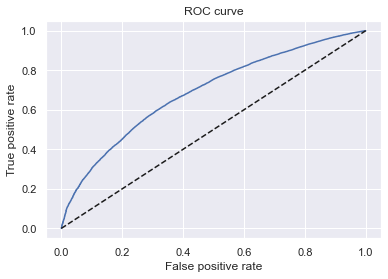

In [61]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [62]:
AUROC = roc_auc_score(df_act_pred['actual_test'],df_act_pred['y_hat_prob'])
AUROC

0.689725446924839

In [63]:
threshold=0.5
for i in range(10):
    print(f'\nThreshold is {round(threshold,3)}')
    confusion_matrix(df_act_pred,threshold)
    threshold += 0.05


Threshold is 0.5


Predicted,0,1
Actual,,
0,0.000043,0.109225
1,0.000043,0.890689


accuracy is 0.891
precision is 0.891

Threshold is 0.55


Predicted,0,1
Actual,,
0,0.000054,0.109214
1,0.000204,0.890528


accuracy is 0.891
precision is 0.891

Threshold is 0.6


Predicted,0,1
Actual,,
0,0.000300,0.108968
1,0.000579,0.890153


accuracy is 0.89
precision is 0.891

Threshold is 0.65


Predicted,0,1
Actual,,
0,0.001137,0.108131
1,0.002241,0.888491


accuracy is 0.89
precision is 0.892

Threshold is 0.7


Predicted,0,1
Actual,,
0,0.003764,0.105504
1,0.008042,0.882690


accuracy is 0.886
precision is 0.893

Threshold is 0.75


Predicted,0,1
Actual,,
0,0.010380,0.098888
1,0.026175,0.864557


accuracy is 0.875
precision is 0.897

Threshold is 0.8


Predicted,0,1
Actual,,
0,0.023794,0.085473
1,0.074043,0.816689


accuracy is 0.84
precision is 0.905

Threshold is 0.85


Predicted,0,1
Actual,,
0,0.048211,0.061057
1,0.184329,0.706403


accuracy is 0.755
precision is 0.92

Threshold is 0.9


Predicted,0,1
Actual,,
0,0.079672,0.029596
1,0.401600,0.489132


accuracy is 0.569
precision is 0.943

Threshold is 0.95


Predicted,0,1
Actual,,
0,0.103242,0.006026
1,0.707314,0.183418


accuracy is 0.287
precision is 0.968


In [79]:
threshold = 0.55

In [80]:
df_act_pred['y_hat'] = np.where(df_act_pred['y_hat_prob']>threshold,1,0)

### Gini and Kolmogorov-Smirnov

In [81]:
df_act_pred.sort_values('y_hat_prob',inplace=True)

In [82]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
0,1,0.391858,0,1,1,0,0.000011,0.000012,0.000000
1,1,0.405587,0,2,2,0,0.000021,0.000024,0.000000
2,0,0.412695,0,3,2,1,0.000032,0.000024,0.000098
3,0,0.453714,0,4,2,2,0.000043,0.000024,0.000196
4,0,0.469547,0,5,2,3,0.000054,0.000024,0.000294


In [66]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat
79625,1,0.988929,1
16899,1,0.989266,1
92691,1,0.989785,1
54837,1,0.989869,1
26378,1,0.990213,1


In [67]:
df_act_pred.reset_index(drop=True,inplace=True)

In [68]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat
0,1,0.391858,0
1,1,0.405587,0
2,0,0.412695,0
3,0,0.453714,0
4,0,0.469547,0


In [69]:
df_act_pred['Cummulative N Population'] = df_act_pred.index + 1
df_act_pred['Cummulative N Good'] = df_act_pred['actual_test'].cumsum()
df_act_pred['Cummulative N Bad'] = df_act_pred['Cummulative N Population'] - df_act_pred['Cummulative N Good']

In [70]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad
0,1,0.391858,0,1,1,0
1,1,0.405587,0,2,2,0
2,0,0.412695,0,3,2,1
3,0,0.453714,0,4,2,2
4,0,0.469547,0,5,2,3


In [71]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad
93252,1,0.988929,1,93253,83063,10190
93253,1,0.989266,1,93254,83064,10190
93254,1,0.989785,1,93255,83065,10190
93255,1,0.989869,1,93256,83066,10190
93256,1,0.990213,1,93257,83067,10190


In [72]:
df_act_pred['Cummulative perc Population'] = df_act_pred['Cummulative N Population'] / df_act_pred.shape[0]
df_act_pred['Cummulative perc Good'] = df_act_pred['Cummulative N Good'] / df_act_pred['actual_test'].sum()
df_act_pred['Cummulative perc Bad'] = df_act_pred['Cummulative N Bad'] / (df_act_pred.shape[0] - df_act_pred['actual_test'].sum())

In [73]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
0,1,0.391858,0,1,1,0,0.000011,0.000012,0.000000
1,1,0.405587,0,2,2,0,0.000021,0.000024,0.000000
2,0,0.412695,0,3,2,1,0.000032,0.000024,0.000098
3,0,0.453714,0,4,2,2,0.000043,0.000024,0.000196
4,0,0.469547,0,5,2,3,0.000054,0.000024,0.000294


In [74]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
93252,1,0.988929,1,93253,83063,10190,0.999957,0.999952,1.0
93253,1,0.989266,1,93254,83064,10190,0.999968,0.999964,1.0
93254,1,0.989785,1,93255,83065,10190,0.999979,0.999976,1.0
93255,1,0.989869,1,93256,83066,10190,0.999989,0.999988,1.0
93256,1,0.990213,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

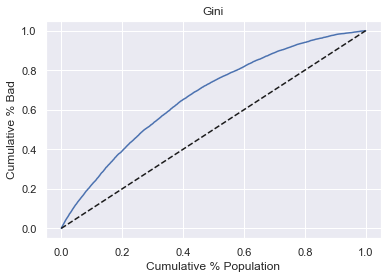

In [75]:
plt.plot(df_act_pred['Cummulative perc Population'],df_act_pred['Cummulative perc Bad'])
plt.plot(df_act_pred['Cummulative perc Population'],df_act_pred['Cummulative perc Population'],linestyle = '--', color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [76]:
Gini = AUROC * 2 - 1
Gini

0.3794508938496779

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

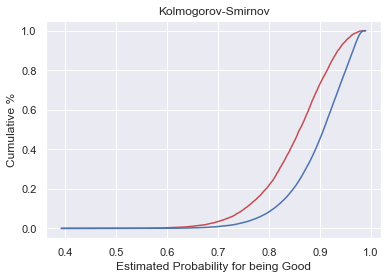

In [77]:
plt.plot(df_act_pred['y_hat_prob'], df_act_pred['Cummulative perc Bad'], color = 'r')
plt.plot(df_act_pred['y_hat_prob'], df_act_pred['Cummulative perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [78]:
KS =max(df_act_pred['Cummulative perc Bad'] - df_act_pred['Cummulative perc Good'])
KS

0.2834577602461038

# Creating ScoreCard

In [ ]:
inputs_test_with_ref_cat.head()

In [ ]:
summary_table

In [ ]:
y_hat_test_prob

In [ ]:
ref_catogery

In [ ]:
df_ref_catogery = pd.DataFrame(ref_catogery,columns=['Feature name'])
df_ref_catogery['Coefficient'] = 0
df_ref_catogery['p_values'] = np.nan
df_ref_catogery

In [ ]:
df_scorecard = pd.concat([summary_table,df_ref_catogery],axis=0)
df_scorecard.reset_index(drop=True,inplace=True)
df_scorecard

In [ ]:
df_scorecard['Orginal Feature Name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

In [ ]:
df_scorecard.groupby('Orginal Feature Name')['Coefficients'].min()

In [ ]:
min_coef_sum = df_scorecard.groupby('Orginal Feature Name')['Coefficients'].min().sum()
min_coef_sum

In [ ]:
max_coef_sum = df_scorecard.groupby('Orginal Feature Name')['Coefficients'].max().sum()
max_coef_sum

In [ ]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_coef_sum - min_coef_sum)
df_scorecard

In [ ]:
df_scorecard['Coefficients'][0]

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_coef_sum) / (max_coef_sum - min_coef_sum)) * (max_score - min_score) + min_score
df_scorecard

In [ ]:
df_scorecard['Score'] = df_scorecard['Score - Calculation'].round()
df_scorecard

### Calculating Credit Score

In [ ]:
inputs_test_with_ref_cat.head()

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat.copy()

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [ ]:
scorecard_scores = df_scorecard['Score']

In [ ]:
scorecard_scores = scorecard_scores.fillna(0)

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

In [ ]:
scorecard_scores.shape

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(96, 1)

In [ ]:
score = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [ ]:
score.head()

In [ ]:
score.tail()

### From Credit Score to PD

In [ ]:
sum_coef_from_score = ((score - min_score) / (max_score - min_score)) * (max_coef_sum - min_coef_sum) + min_coef_sum

In [ ]:
sum_coef_from_score.head()

In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

In [ ]:
y_hat_test_prob[0: 5]

In [ ]:
df_act_pred['y_hat_prob'].head()